In [59]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import art3d
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error

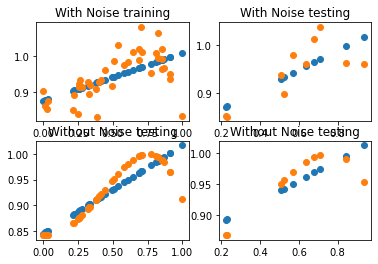

RMSE training with noise:  0.049409341609218095
RMSE training with noise:  0.024583151073497563
RMSE testing with noise:  0.03854534778727767
RMSE testing without noise:  0.026847509491050383


In [64]:
input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))

noisefull = noiseless + noise

x_train1, x_test1, y_train1, y_test1 = train_test_split(input, noiseless, test_size=0.2, random_state=0)
x_train2, x_test2, y_train2, y_test2 = train_test_split(input, noisefull, test_size=0.2, random_state=0)
fig, ((f1, f2), (f3, f4)) = plt.subplots(2, 2)

### with noise training
b11 = y_train2.reshape(y_train2.shape[0],1)
A11 = np.concatenate((x_train2, np.ones((x_train2.shape[0], 1))), axis=1)
z11 = np.dot(np.dot(inv(np.dot(A11.T,  A11)), A11.T),  b11)
y11 = z11[0] * x_train2 + z11[1]
f1.scatter(x_train2, y11)
f1.scatter(x_train2, y_train2)
f1.set_title("With Noise training")


### with noise testing
b12 = y_test2.reshape(y_test2.shape[0],1)
A12 = np.concatenate((x_test2, np.ones((x_test2.shape[0], 1))), axis=1)
z12 = np.dot(np.dot(inv(np.dot(A12.T,  A12)), A12.T),  b12)
y12 = z12[0] * x_test2 + z12[1]
f2.scatter(x_test2, y12)
f2.scatter(x_test2, y_test2)
f2.set_title("With Noise testing")


###Without Noise training
b21 = y_train1.reshape(y_train1.shape[0],1)
A21 = np.concatenate((x_train1, np.ones((x_train1.shape[0], 1))), axis=1)
z21 = np.dot(np.dot(inv(np.dot(A21.T,  A21)), A21.T),  b21)
y21 = z21[0] * x_train1 + z21[1]
f3.scatter(x_train1, y21)
f3.scatter(x_train1, y_train1)
f3.set_title("Without Noise testing")


### wWithout noise testing
b22 = y_test1.reshape(y_test1.shape[0],1)
A22 = np.concatenate((x_test1, np.ones((x_test1.shape[0], 1))), axis=1)
z22 = np.dot(np.dot(inv(np.dot(A22.T,  A22)), A22.T),  b22)
y22 = z22[0] * x_test1 + z22[1]
f4.scatter(x_test1, y22)
f4.scatter(x_test1, y_test1)
f4.set_title("Without Noise testing")

plt.show() 

print("RMSE training with noise: " , np.sqrt(mean_squared_error(y11,y_train2)))
print("RMSE training with noise: " , np.sqrt(mean_squared_error(y21,y_train1)))

print("RMSE testing with noise: " , np.sqrt(mean_squared_error(y12,y_test2)))
print("RMSE testing without noise: " , np.sqrt(mean_squared_error(y22,y_test1)))

Polynomial Regression Model(Closed-form)

RMSE for degree 1:  0.021432223418542538
RMSE for degree 2:  0.015539482947086621
RMSE for degree 3:  0.0019382056679044587
RMSE for degree 4:  6.076790224794795e-05


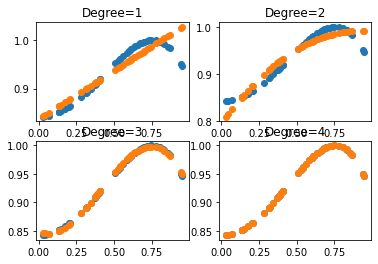

In [72]:
def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow


def block(temp,temp2):
  p1 = np.linalg.inv(np.dot(temp.transpose(), temp))
  p2 = np.dot(p1, temp.transpose())
  W = np.dot(p2, temp2)
  return W

input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise

X = input
X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = noiseless
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)


### Degree 1 Function
deg1 = 1
X1 = getPoweredX(deg1, X_train)
W1=block(X1,Y)
ax1.scatter(X, Y)
ax1.scatter(X1[:,1], np.dot(X1, W1))
ax1.set_title("Degree=1")
print("RMSE for degree 1: ", np.sqrt(mean_squared_error((np.dot(X1, W1)),Y)))


### Degree 2 function
deg2 = 2
X2 = getPoweredX(deg2, X_train)
W2 = block(X2,Y)
ax2.scatter(X, Y)
ax2.scatter(X2[:,1], np.dot(X2, W2))
ax2.set_title("Degree=2")
print("RMSE for degree 2: ", np.sqrt(mean_squared_error((np.dot(X2, W2)),Y)))


### Degree 3 Function
deg3 = 3
X3 = getPoweredX(deg3, X_train)
W3 = block(X3, Y)
ax3.scatter(X, Y)
ax3.scatter(X3[:,1], np.dot(X3, W3))
ax3.set_title("Degree=3")
print("RMSE for degree 3: ", np.sqrt(mean_squared_error((np.dot(X3, W3)),Y)))


###Degree 4 Function
deg4 = 4
X4 = getPoweredX(deg4, X_train)
W4 = block(X4, Y)
ax4.scatter(X, Y)
ax4.scatter(X4[:,1],np.dot(X4,W4))
ax4.set_title("Degree=4")
print("RMSE for degree 4: ", np.sqrt(mean_squared_error((np.dot(X4, W4)),Y)))

plt.show()